<a href="https://colab.research.google.com/github/danielbenhur/NEADES_daniel/blob/main/aula_2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Construindo seu primeiro mapa no Python

#Utilizando a bibioteca GeoBR

In [ ]:
#Instalando a biblioteca GeoBR
!pip install geobr -q

In [ ]:
#Instalando o rtree e uma versão específica do geopandas
!pip install rtree -q
!pip install geopandas==0.12.0 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geobr 0.2.0 requires geopandas<0.8.0,>=0.7.0, but you have geopandas 0.12.0 which is incompatible.


In [ ]:
import geobr

In [ ]:
# Liste todos os dados disponíveis na biblioteca geoBR
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [ ]:
#Obtendo os setores cencitários do censo de 2010 para o estado do Espírito Santo
uf="ES"
censo_uf_2010=geobr.read_census_tract(code_tract=uf, year=2010)
#censo_sp_2010=geobr.read_census_tract(code_tract="SP", year=2010)

In [ ]:
#Inspecionando esses dados mostrando os primeiros 5 registros
censo_uf_2010.head(5)

code_tract    zone  code_muni           name_muni name_neighborhood  \
0  320010205000001  URBANO  3200102.0      Afonso Cláudio               NaN   
1  320010205000002  URBANO  3200102.0      Afonso Cláudio               NaN   
2  320010205000003  URBANO  3200102.0      Afonso Cláudio               NaN   
3  320016930000003   RURAL  3200169.0  Água Doce Do Norte               NaN   
4  320016930000004   RURAL  3200169.0  Água Doce Do Norte               NaN   

   code_neighborhood  code_subdistrict name_subdistrict  code_district  \
0                NaN      3.200102e+10              NaN    320010205.0   
1                NaN      3.200102e+10              NaN    320010205.0   
2                NaN      3.200102e+10              NaN    320010205.0   
3                NaN      3.200169e+10              NaN    320016930.0   
4                NaN      3.200169e+10              NaN    320016930.0   

    name_district  code_state  \
0  Afonso Cláudio        32.0   
1  Afonso Cláudio        32.0   
2  Afonso Cláudio        32.0   
3     Vila Nelita        32.0   
4     Vila Nelita        32.0   

                                            geometry  
0  MULTIPOLYGON (((-41.12462 -20.07742, -41.12326...  
1  MULTIPOLYGON (((-41.12204 -20.08280, -41.12187...  
2  MULTIPOLYGON (((-41.12204 -20.08280, -41.12101...  
3  MULTIPOLYGON (((-41.01536 -18.47319, -41.01569...  
4  MULTIPOLYGON (((-41.00335 -18.42995, -41.00238...

In [ ]:
#Também podemos verificar o número de linhas e colunas do nosso geodataframe.
#O número de linhas, nesse caso, é a quantidade de setores censitários
censo_uf_2010.shape

(6454, 12)

<Axes: >

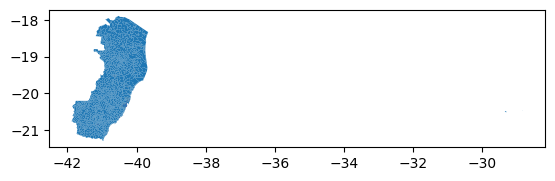

In [ ]:
censo_uf_2010.plot()

In [ ]:
#censo_sp_2010.plot()

#Manipulando dados com a biblioteca pandas

In [ ]:
#Importe a pandas com o apelido "pd"
import pandas as pd

In [ ]:
#Obtendo o nome de todos os municípios do nosso geodataframe
munis=pd.unique(censo_uf_2010.name_muni)
#munis_sp=pd.unique(censo_sp_2010.name_muni)

In [ ]:
#mostra o número de municípios
print(uf,"=",len(munis))
#print("SP=",len(munis_sp))

ES = 78


In [ ]:
#Mostra o nome dos minicípios
print(munis)

['Afonso Cláudio' 'Água Doce Do Norte' 'Alegre' 'Águia Branca'
 'Alfredo Chaves' 'Alto Rio Novo' 'Anchieta' 'Apiacá' 'Aracruz'
 'Atilio Vivacqua' 'Baixo Guandu' 'Barra De São Francisco'
 'Cachoeiro De Itapemirim' 'Cariacica' 'Guarapari' 'Linhares' 'Muqui'
 'Nova Venécia' 'Pancas' 'Serra' 'Boa Esperança' 'Bom Jesus Do Norte'
 'Brejetuba' 'Castelo' 'Colatina' 'Conceição Da Barra'
 'Conceição Do Castelo' 'Divino De São Lourenço' 'Domingos Martins'
 'Dores Do Rio Preto' 'Ecoporanga' 'Fundão' 'Governador Lindenberg'
 'Guaçuí' 'Ibatiba' 'Ibiraçu' 'Ibitirama' 'Iconha' 'Irupi' 'Itaguaçu'
 'Itapemirim' 'Itarana' 'Iúna' 'Jaguaré' 'Jerônimo Monteiro' 'João Neiva'
 'Laranja Da Terra' 'Mantenópolis' 'Marataízes' 'Marechal Floriano'
 'Marilândia' 'Mimoso Do Sul' 'Montanha' 'Mucurici' 'Muniz Freire'
 'Pedro Canário' 'Pinheiros' 'Piúma' 'Ponto Belo' 'Presidente Kennedy'
 'Rio Bananal' 'Rio Novo Do Sul' 'Santa Leopoldina'
 'Santa Maria De Jetibá' 'Santa Teresa' 'São Domingos Do Norte'
 'São Gabriel Da 

In [ ]:
# #Vamos importar a biblioteca time para causar uma pausa na execução do código com time.sleep
# import time
# #Aqui estamos executando um loop de for que repete a ação para cada item na varialvel munis_"UF"
# #for mun in munis:
# print(mun)
# time.sleep(2)

In [ ]:
#Verificando nomes que começam com "Vi"
nomes=[mun for mun in munis if mun.startswith('Vi')]
nomes

['Vila Velha', 'Vitória', 'Viana', 'Vila Pavão', 'Vila Valério']

In [ ]:
#Selecionando apenas os cetores cencitários do município e armazenando em uma variável
mun="Santa Maria De Jetibá"
censo_mun_2010=censo_uf_2010[censo_uf_2010['name_muni']==mun]

<Axes: >

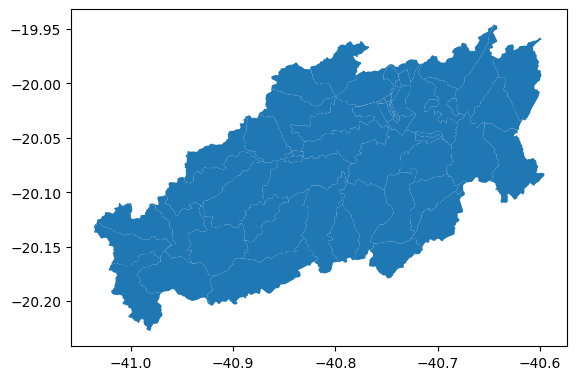

In [ ]:
#Visualizando a geometria dos dados selecionados
censo_mun_2010.plot()

In [ ]:
#Inspecionando os resultadados
censo_mun_2010.head(5)

code_tract    zone  code_muni              name_muni  \
3952  320455905000001  URBANO  3204559.0  Santa Maria De Jetibá   
3953  320455905000002  URBANO  3204559.0  Santa Maria De Jetibá   
3954  320455905000003  URBANO  3204559.0  Santa Maria De Jetibá   
3955  320455905000004  URBANO  3204559.0  Santa Maria De Jetibá   
3956  320455905000005  URBANO  3204559.0  Santa Maria De Jetibá   

     name_neighborhood  code_neighborhood  code_subdistrict name_subdistrict  \
3952               NaN                NaN      3.204559e+10              NaN   
3953               NaN                NaN      3.204559e+10              NaN   
3954               NaN                NaN      3.204559e+10              NaN   
3955               NaN                NaN      3.204559e+10              NaN   
3956               NaN                NaN      3.204559e+10              NaN   

      code_district          name_district  code_state  \
3952    320455905.0  Santa Maria De Jetibá        32.0   
3953    320455905.0  Santa Maria De Jetibá        32.0   
3954    320455905.0  Santa Maria De Jetibá        32.0   
3955    320455905.0  Santa Maria De Jetibá        32.0   
3956    320455905.0  Santa Maria De Jetibá        32.0   

                                               geometry  
3952  MULTIPOLYGON (((-40.74157 -20.02820, -40.74076...  
3953  MULTIPOLYGON (((-40.74562 -20.02502, -40.74577...  
3954  MULTIPOLYGON (((-40.74608 -20.01587, -40.74425...  
3955  MULTIPOLYGON (((-40.74594 -20.01037, -40.74570...  
3956  MULTIPOLYGON (((-40.74598 -20.01497, -40.74484...

#Adicionando mais dados nessa mistura

In [ ]:
#Lendo as instalações de saúde do Brasil e armazenando na variável urbano
saude=geobr.read_health_facilities()

<Axes: >

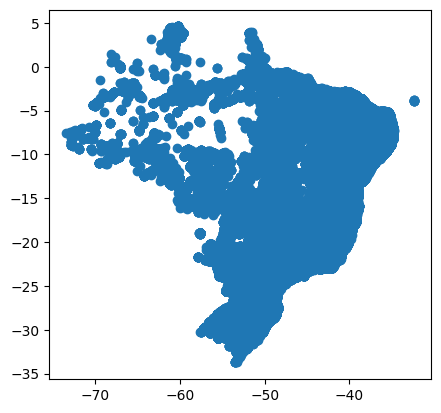

In [ ]:
#Visualizando a geometria dos dados
saude.plot()

In [ ]:
#Inspecionando os dados
saude.head(3)

code_cnes  code_muni  code_state abbrev_state date_update  year_update  \
0  2684403.0   412510.0        41.0           PR  2015-05-27       2015.0   
1  2684411.0   412510.0        41.0           PR  2015-05-27       2015.0   
2  2684438.0   412510.0        41.0           PR  2015-05-27       2015.0   

  data_source                     geometry  
0        PMAQ  POINT (-50.29700 -25.68300)  
1        PMAQ  POINT (-50.39324 -25.65507)  
2        PMAQ  POINT (-50.30140 -25.68776)

<Axes: >

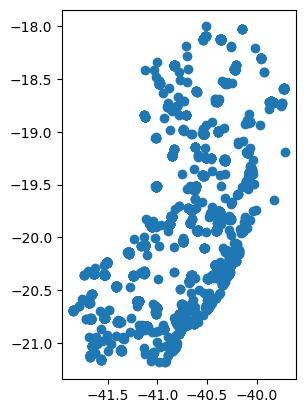

In [ ]:
#Selecionando apenas os dados do ES
saude_uf=saude[saude.abbrev_state==uf]
#Visualizando os resultados
saude_uf.plot()

In [ ]:
#Inspecionando os dados
saude_uf.head(3)

code_cnes  code_muni  code_state abbrev_state date_update  year_update  \
6173  2448971.0   320016.0        32.0           ES  2015-05-27       2015.0   
6821  2449021.0   320016.0        32.0           ES  2015-05-27       2015.0   
6822  2444909.0   320030.0        32.0           ES  2015-05-27       2015.0   

     data_source                     geometry  
6173        PMAQ  POINT (-41.12329 -18.41885)  
6821        PMAQ  POINT (-41.01370 -18.47794)  
6822        PMAQ  POINT (-40.75000 -20.63500)

In [ ]:
#Verificando o número de linhas e colunas. Aqui o número de linhas é a quantidade de unidades de saúde
saude_uf.shape

(7866, 8)

#Criando figuras com o matplotlib


In [ ]:
#Importe a biblioteca com o apelido "plt"
import matplotlib.pyplot as plt

<Axes: >

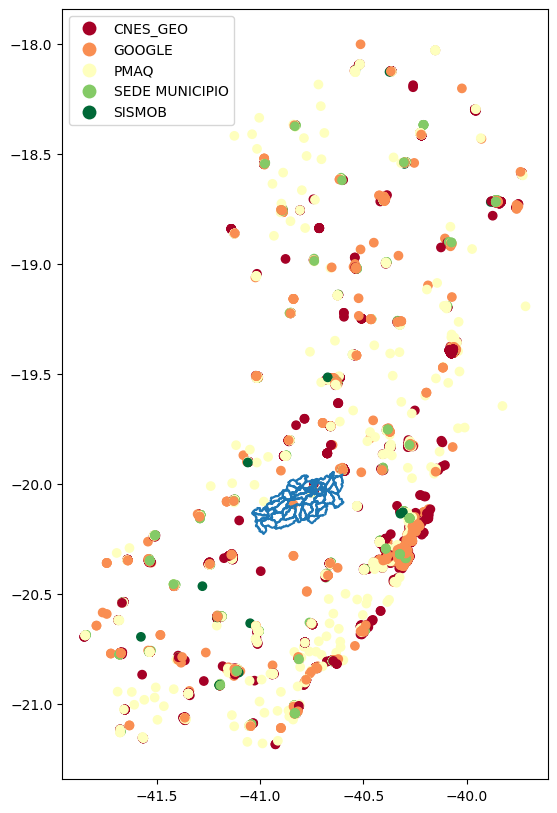

In [ ]:
#Crie uma figura, um eixo de plotagem e determinte o tamanho da figura em polegadas (figsize)
fig,eixo = plt.subplots(figsize=(10,10))
#Plote os dados e use a coluna density como atributo
saude_uf.plot(column=saude_uf.data_source, categorical=True, ax=eixo, cmap='RdYlGn', legend=True)
#Adicionando os limites (.bondary) dos setores cencitários do município
censo_mun_2010.boundary.plot(ax=eixo)

In [ ]:
#usando spacial join para criar novo layer
saude_mun=saude_uf.sjoin(censo_mun_2010, predicate='within')

<Axes: >

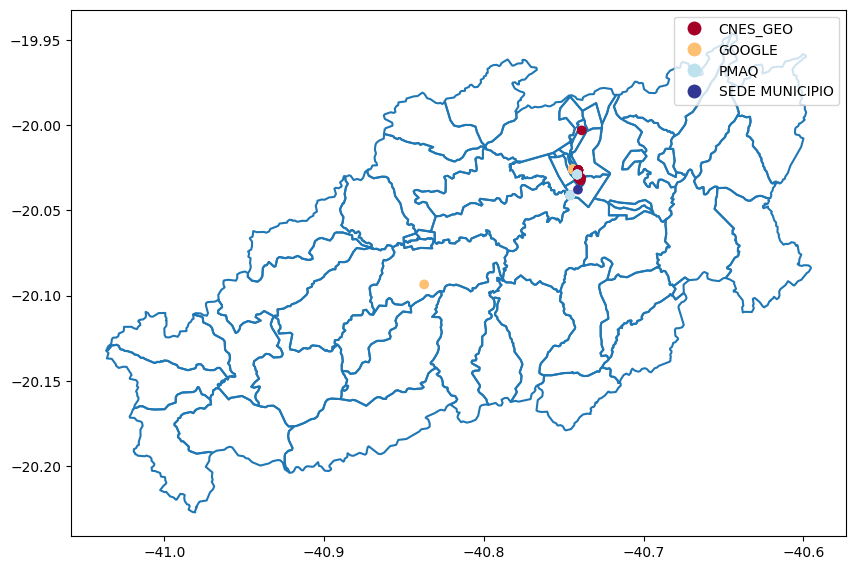

In [ ]:
fig,eixo=plt.subplots(figsize=(10,10))
saude_mun.plot(column=saude_mun.data_source, categorical=True, ax=eixo, cmap='RdYlBu', legend=True)
censo_mun_2010.boundary.plot(ax=eixo, zorder=0)

#Adicionando mapas base

In [ ]:
!pip install contextily -q

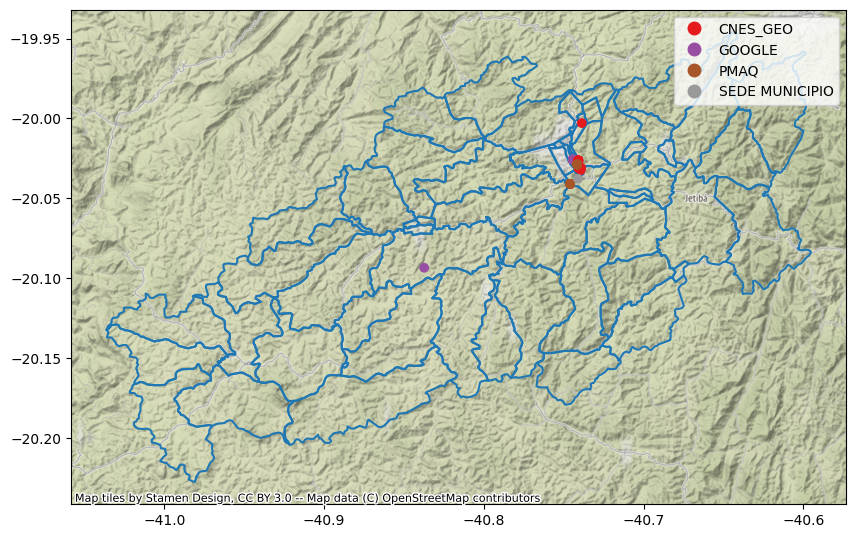

In [ ]:
#Importe a biblioteca com o apelido ctx
import contextily as ctx

#criando mapa
fig,eixo=plt.subplots(figsize=(10,10))
saude_mun.plot(column=saude_mun.data_source, ax=eixo, cmap="Set1", legend=True, categorical=True)
#Adicionando limites aos setores sencitários do município
censo_mun_2010.boundary.plot(ax=eixo, zorder=0)
#Adicionando o mapa base, com o crs de saude_mun e trazendo para traz do mapa
ctx.add_basemap(ax=eixo, crs=saude_mun.crs, zorder=-1)

In [ ]:
!pip install mapclassify -q

In [ ]:
#Criando um mapa navegável
saude_mun.explore(column=saude_mun.data_source, cmap="Set1", legend=True, categorical=True)

#Operações geométricas com a geopandas

In [ ]:
#Dissolvendo os setores cencitários com base no código do município
mun_lim=censo_mun_2010.dissolve(by='code_muni')
#Inspecionando o resultado 
mun_lim.head()

geometry       code_tract  \
code_muni                                                                       
3204559.0  POLYGON ((-40.98484 -20.22583, -40.98417 -20.2...  320455905000001   

             zone              name_muni name_neighborhood  code_neighborhood  \
code_muni                                                                       
3204559.0  URBANO  Santa Maria De Jetibá              None                NaN   

           code_subdistrict name_subdistrict  code_district  \
code_muni                                                     
3204559.0      3.204559e+10             None    320455905.0   

                   name_district  code_state  
code_muni                                     
3204559.0  Santa Maria De Jetibá        32.0

In [ ]:
#Verificando se nossos dados estão no mesmo sistemad e coordenadas (crs)
saude_mun.crs==mun_lim.crs

True

In [ ]:
#Verificando qual é o sistema de coordenadas
saude_mun.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

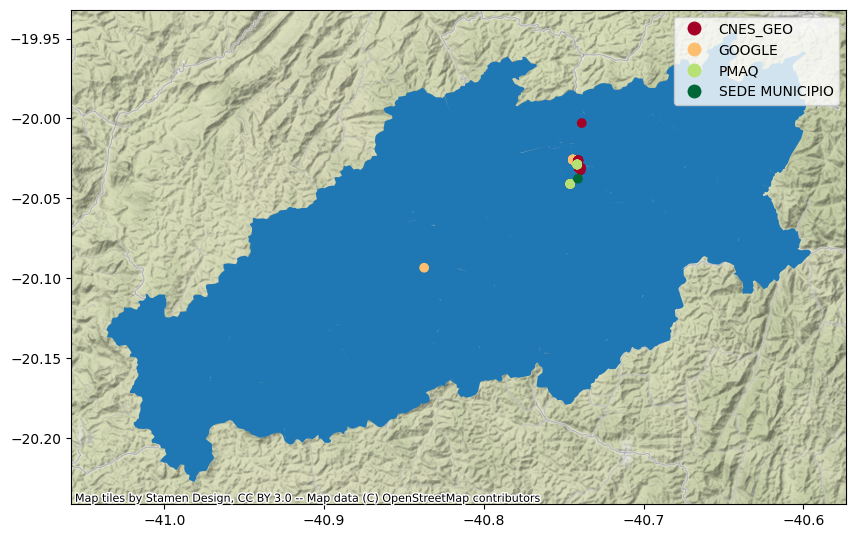

In [ ]:
fig,eixo=plt.subplots(figsize=(10,10))
#Plotando o polígono do limite do município
mun_lim.plot(ax=eixo)
saude_mun.plot(column=saude_mun.data_source,categorical= True, ax=eixo, cmap='RdYlGn', legend=True)
#Adicionando o mapa base
ctx.add_basemap(ax=eixo, crs=saude_mun.crs, zorder=-1)



#Transformando figuras em mapas

In [ ]:
import pandas as pd

In [ ]:
saude_mun.head(10)

code_cnes  code_muni_left  code_state_left abbrev_state date_update  \
16984   7903375.0        320455.0             32.0           ES  2016-02-05   
23397   7921063.0        320455.0             32.0           ES  2016-04-12   
23398   7935064.0        320455.0             32.0           ES  2016-04-12   
51151   9077391.0        320455.0             32.0           ES  2016-12-13   
53447   9148728.0        320455.0             32.0           ES  2017-02-22   
222881  9215581.0        320455.0             32.0           ES  2017-05-10   
298927  7780761.0        320455.0             32.0           ES  2015-09-02   
340700  9341552.0        320455.0             32.0           ES  2017-11-17   
34876   2568829.0        320455.0             32.0           ES  2015-05-27   
34877   3197336.0        320455.0             32.0           ES  2015-05-27   

        year_update data_source                     geometry  index_right  \
16984        2016.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
23397        2016.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
23398        2016.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
51151        2016.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
53447        2017.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
222881       2017.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
298927       2015.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
340700       2017.0      GOOGLE  POINT (-40.74432 -20.02578)         3990   
34876        2015.0    CNES_GEO  POINT (-40.74050 -20.03087)         3989   
34877        2015.0    CNES_GEO  POINT (-40.74050 -20.03087)         3989   

             code_tract    zone  code_muni_right              name_muni  \
16984   320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
23397   320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
23398   320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
51151   320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
53447   320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
222881  320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
298927  320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
340700  320455905000039  URBANO        3204559.0  Santa Maria De Jetibá   
34876   320455905000038  URBANO        3204559.0  Santa Maria De Jetibá   
34877   320455905000038  URBANO        3204559.0  Santa Maria De Jetibá   

       name_neighborhood  code_neighborhood  code_subdistrict  \
16984                NaN                NaN      3.204559e+10   
23397                NaN                NaN      3.204559e+10   
23398                NaN                NaN      3.204559e+10   
51151                NaN                NaN      3.204559e+10   
53447                NaN                NaN      3.204559e+10   
222881               NaN                NaN      3.204559e+10   
298927               NaN                NaN      3.204559e+10   
340700               NaN                NaN      3.204559e+10   
34876                NaN                NaN      3.204559e+10   
34877                NaN                NaN      3.204559e+10   

       name_subdistrict  code_district          name_district  \
16984               NaN    320455905.0  Santa Maria De Jetibá   
23397               NaN    320455905.0  Santa Maria De Jetibá   
23398               NaN    320455905.0  Santa Maria De Jetibá   
51151               NaN    320455905.0  Santa Maria De Jetibá   
53447               NaN    320455905.0  Santa Maria De Jetibá   
222881              NaN    320455905.0  Santa Maria De Jetibá   
298927              NaN    320455905.0  Santa Maria De Jetibá   
340700              NaN    320455905.0  Santa Maria De Jetibá   
34876               NaN    320455905.0  Santa Maria De Jetibá   
34877               NaN    320455905.0  Santa Maria De Jetibá   

        code_state_right  
16984

In [ ]:
#Primeiro vamos contar o número de instalações de saúde por setor censitário
saude_count=(saude_mun.groupby('code_tract').size()).to_frame(name="n_saude")
saude_count=saude_count.reset_index()
saude_count.head()

code_tract  n_saude
0  320455905000001        9
1  320455905000009        1
2  320455905000019        8
3  320455905000038       17
4  320455905000039        8

In [ ]:
#Combinamos a contagem com as geometrias dos setores censitáriso usando o merge
saude_mun_setor=pd.merge(censo_mun_2010, saude_count, how="left")

In [ ]:
saude_mun_setor

code_tract    zone  code_muni              name_muni  \
0   320455905000001  URBANO  3204559.0  Santa Maria De Jetibá   
1   320455905000002  URBANO  3204559.0  Santa Maria De Jetibá   
2   320455905000003  URBANO  3204559.0  Santa Maria De Jetibá   
3   320455905000004  URBANO  3204559.0  Santa Maria De Jetibá   
4   320455905000005  URBANO  3204559.0  Santa Maria De Jetibá   
..              ...     ...        ...                    ...   
60  320455915000015   RURAL  3204559.0  Santa Maria De Jetibá   
61  320455915000016   RURAL  3204559.0  Santa Maria De Jetibá   
62  320455915000017   RURAL  3204559.0  Santa Maria De Jetibá   
63  320455915000018   RURAL  3204559.0  Santa Maria De Jetibá   
64  320455915000019   RURAL  3204559.0  Santa Maria De Jetibá   

   name_neighborhood  code_neighborhood  code_subdistrict name_subdistrict  \
0                NaN                NaN      3.204559e+10              NaN   
1                NaN                NaN      3.204559e+10              NaN   
2                NaN                NaN      3.204559e+10              NaN   
3                NaN                NaN      3.204559e+10              NaN   
4                NaN                NaN      3.204559e+10              NaN   
..               ...                ...               ...              ...   
60               NaN                NaN      3.204559e+10              NaN   
61               NaN                NaN      3.204559e+10              NaN   
62               NaN                NaN      3.204559e+10              NaN   
63               NaN                NaN      3.204559e+10              NaN   
64               NaN                NaN      3.204559e+10              NaN   

    code_district          name_district  code_state  \
0     320455905.0  Santa Maria De Jetibá        32.0   
1     320455905.0  Santa Maria De Jetibá        32.0   
2     320455905.0  Santa Maria De Jetibá        32.0   
3     320455905.0  Santa Maria De Jetibá        32.0   
4     320455905.0  Santa Maria De Jetibá        32.0   
..            ...                    ...         ...   
60    320455915.0               Garrafão        32.0   
61    320455915.0               Garrafão        32.0   
62    320455915.0               Garrafão        32.0   
63    320455915.0               Garrafão        32.0   
64    320455915.0               Garrafão        32.0   

                                             geometry  n_saude  
0   MULTIPOLYGON (((-40.74157 -20.02820, -40.74076...      9.0  
1   MULTIPOLYGON (((-40.74562 -20.02502, -40.74577...      NaN  
2   MULTIPOLYGON (((-40.74608 -20.01587, -40.74425...      NaN  
3   MULTIPOLYGON (((-40.74594 -20.01037, -40.74570...      NaN  
4   MULTIPOLYGON (((-40.74598 -20.01497, -40.74484...      NaN  
..                                                ...      ...  
60  MULTIPOLYGON (((-40.96601 -20.10294, -40.96405...      NaN  
61  MULTIPOLYGON (((-40.97802 -20.22110, -40.98033...      NaN  
62  MULTIPOLYGON (((-40.88893 -20.14423, -40.88900...      NaN  
63  MULTIPOLYGON (((-40.79414 -20.10171, -40.79305...      NaN  
64  MULTIPOLYGON (((-40.94784 -20.08893, -40.94515...      NaN  

[65 rows x 13 columns]

In [ ]:
#Preenchemos os valores NA com zero para evitar erros de plotagem
saude_mun_setor['n_saude']=saude_mun_setor['n_saude'].fillna(0)

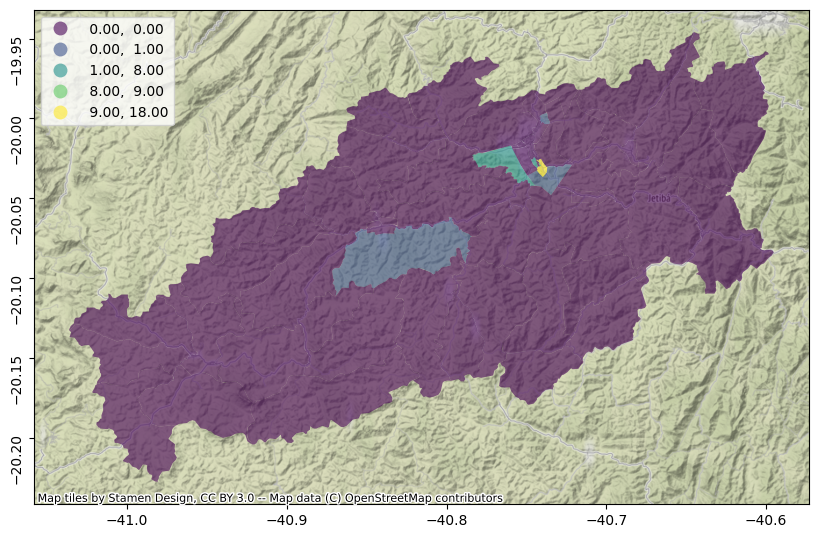

In [ ]:
fig,eixo=plt.subplots(figsize=(10,10))
#Plotando o polígono do município com os dados de instalações de saúde por setor
saude_mun_setor.plot(column=saude_mun_setor.n_saude, k=5, scheme="NaturalBreaks", alpha=0.6, ax=eixo, legend=True, legend_kwds={"loc": "upper left"})
ctx.add_basemap(ax=eixo, crs=saude_mun_setor.crs, zorder=-1)
#Rotacionando os rótulos do eixo y
eixo.tick_params(axis='y', labelrotation=90)

In [ ]:
#Instalando biblioteca
!pip install matplotlib-scalebar -q

In [ ]:
#Importando o recurso de escala gráfica (scaleBar) da biblioteca
from matplotlib_scalebar.scalebar import ScaleBar
#Importando o patches para criar uma legenda personalizada
from matplotlib.patches import Patch

In [ ]:
#Reprojetando os dados para epsg=31984 -> SIRGAS 2000 UTM 24S
censo_mun_2010.to_crs(epsg=31984, inplace=True)
saude_mun_setor.to_crs(epsg=31984, inplace=True)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


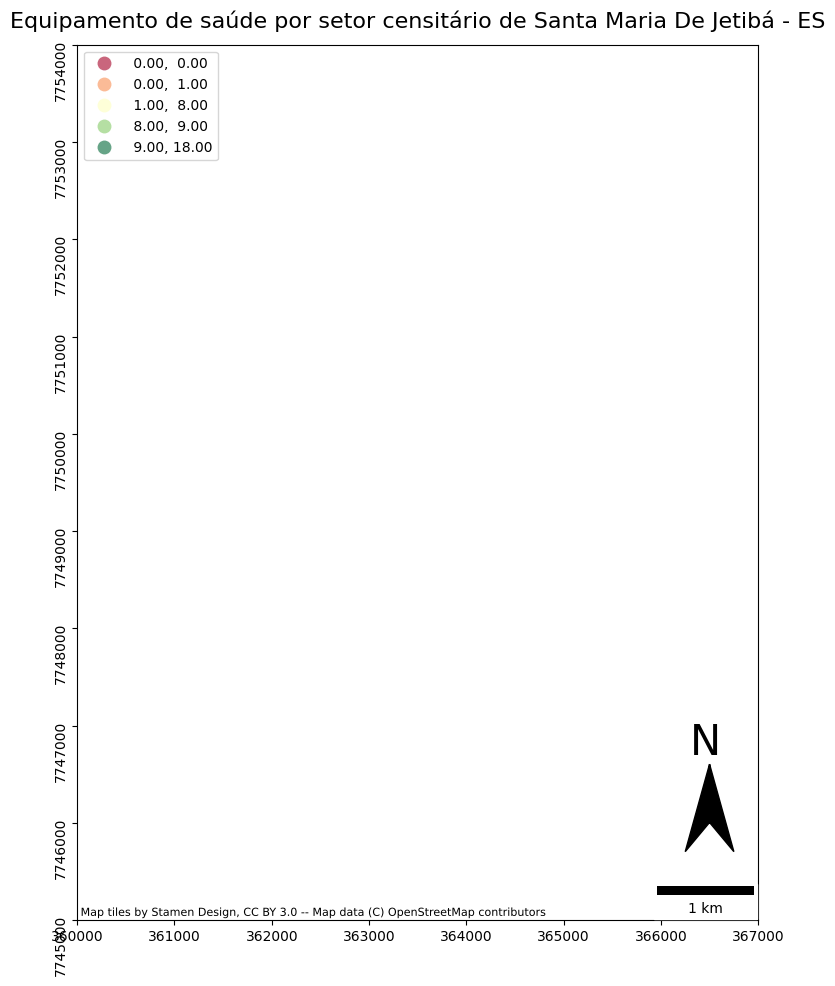

In [ ]:
#Criando o plot editando o código anterior que gerou nosso mapa
fig,eixo=plt.subplots(figsize=(15,10))
#Adicionando Título
fig.suptitle("Equipamento de saúde por setor censitário de %s - %s" % (mun, uf), fontsize=16)
#Plotando o polígono de VV
saude_mun_setor.plot(column=saude_mun_setor.n_saude, k=5, cmap="RdYlGn", scheme="naturalbreaks", ax=eixo, alpha=0.6, 
                    legend=True, legend_kwds={"loc": "upper left"}, zorder=1)
#Especificando CRS e adicionando borda
saude_mun_setor.boundary.plot(ax=eixo, alpha=0.6, linewidth=0.8, color='yellow')
#Rotacionando os rótulos do eixo y
eixo.tick_params(axis='y', labelrotation=90)
#Adicionando mapa base
ctx.add_basemap(ax=eixo, crs=saude_mun_setor.crs, zoom=13)
#Adicionando a escala, dx=1 é o padrão para sistema de coordenadas métricas
#location indica onde a escala será colocada
eixo.add_artist(ScaleBar(dx=1, location='lower right'))
eixo.ticklabel_format(useOffset=False, style='plain')

#Definindo limites para a área visualizada
eixo.set_ylim(7745000,7754000)
eixo.set_xlim(360000,367000)

# Adicionando o N do norte como anotação de texto
eixo.text(x=366300, y=7746700, s='N', fontsize=30)
# Adicionando uma seta para indicar o norte
eixo.arrow(x=366500, y=7746000, dx=0, dy=5, length_includes_head=True,
head_width=500, head_length=300, overhang=3, facecolor='k')

# Evite sobreposições no itens do mapa
fig.tight_layout(pad=1)

# Salvando a figura atual como um arquivo PNG chamado "uf_mun.png"
plt.savefig("%s_%s.png" % (uf, mun))

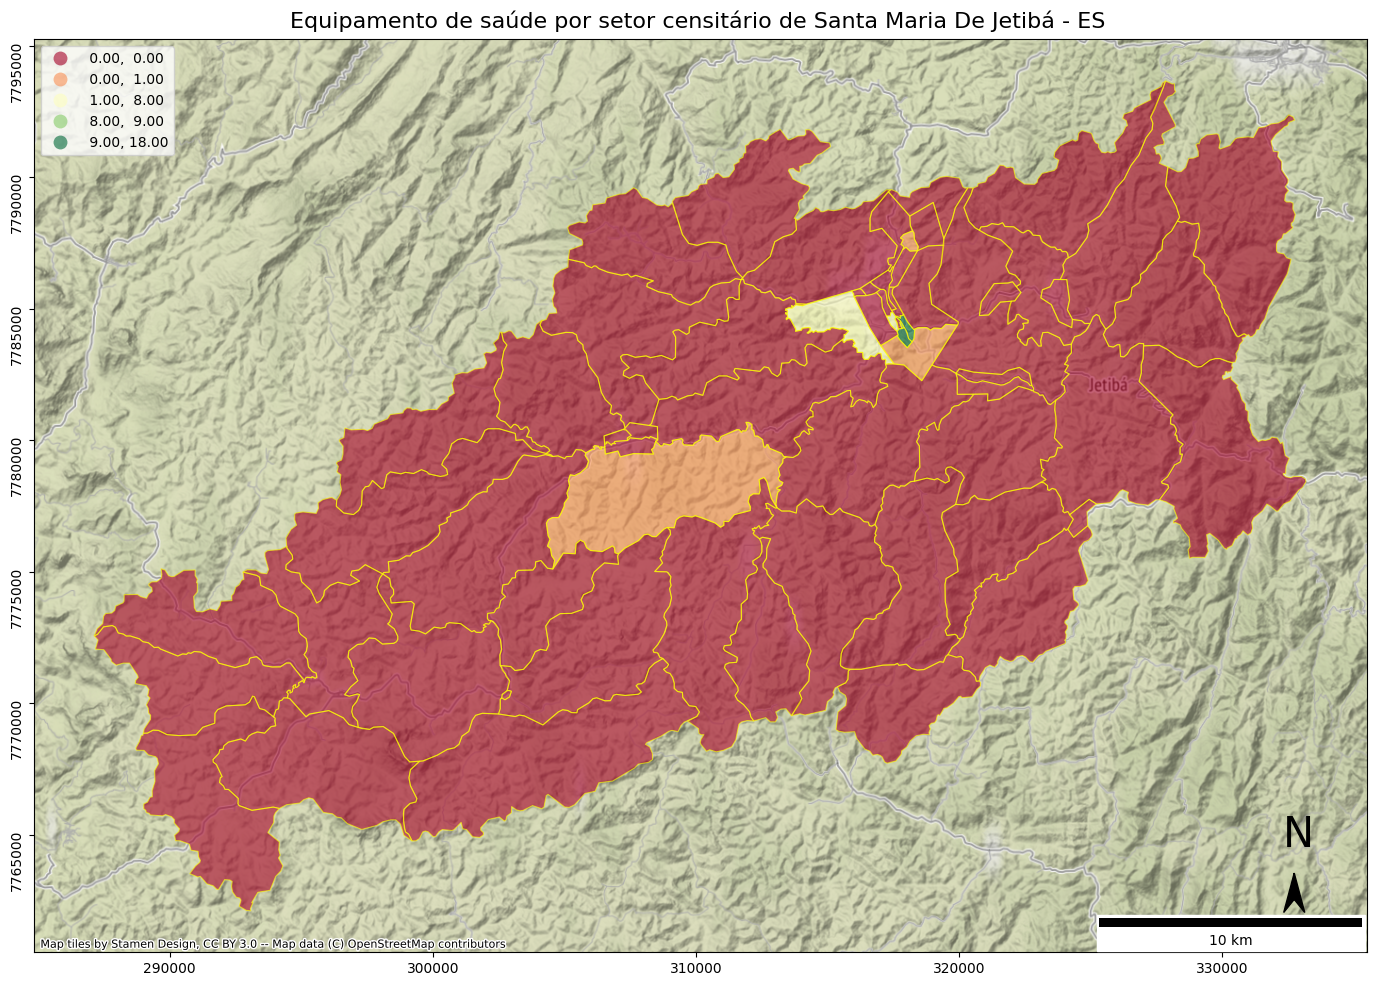

In [ ]:
#Criando o plot editando o código anterior que gerou nosso mapa
fig,eixo=plt.subplots(figsize=(15,10))
#Adicionando Título
fig.suptitle("Equipamento de saúde por setor censitário de %s - %s" % (mun, uf), fontsize=16)
#Plotando o polígono de VV
saude_mun_setor.plot(column=saude_mun_setor.n_saude, k=5, cmap="RdYlGn", scheme="naturalbreaks", ax=eixo, alpha=0.6, 
                    legend=True, legend_kwds={"loc": "upper left"}, zorder=1)
#Especificando CRS e adicionando borda
saude_mun_setor.boundary.plot(ax=eixo, alpha=0.6, linewidth=0.8, color='yellow')
#Rotacionando os rótulos do eixo y
eixo.tick_params(axis='y', labelrotation=90)
#Adicionando mapa base
ctx.add_basemap(ax=eixo, crs=saude_mun_setor.crs)
#Adicionando a escala, dx=1 é o padrão para sistema de coordenadas métricas
#location indica onde a escala será colocada
eixo.add_artist(ScaleBar(dx=1, location='lower right'))
eixo.ticklabel_format(useOffset=False, style='plain')

# Obtendo os limites dos eixos x e y
x_min, x_max = eixo.get_xlim()
y_min, y_max = eixo.get_ylim()

# Calculando as coordenadas x e y da cauda da seta
x = x_max - 2750 # subtraindo um valor para deixar um espaço entre a seta e a borda do gráfico
y = y_min + 2000 # somando um valor para deixar um espaço entre a seta e a borda do gráfico

# Adicionando o N do norte como anotação de texto
eixo.text(x=x-450, y=y+2000, s='N', fontsize=30) # ajustando as coordenadas do texto de acordo com as da seta
# Adicionando uma seta para indicar o norte
eixo.arrow(x=x, y=y, dx=0, dy=12, length_includes_head=True,
head_width=800, head_length=500, overhang=3, facecolor='k')

# Evite sobreposições no itens do mapa
fig.tight_layout(pad=1)

# Salvando a figura atual como um arquivo PNG chamado "uf_mun.png"
plt.savefig("%s_%s.png" % (uf, mun))